<a href="https://colab.research.google.com/github/Goldenseek/CSE416A-Final-Project/blob/master/US_Aviation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
flights=pd.read_csv("./drive//My Drive/flights-and-airports-data/flights.csv")
airports=pd.read_csv("./drive//My Drive/flights-and-airports-data/airports.csv")

In [0]:
cleanFlights=flights[["Carrier",'OriginAirportID','DestAirportID']]
carriers=list(set(flights['Carrier']))

In [0]:
networks=[]
for carrier in carriers:
  temp=cleanFlights.loc[cleanFlights['Carrier'] == carrier]
  tempG=nx.from_pandas_edgelist(temp,'OriginAirportID','DestAirportID')
  tempG = tempG.subgraph(max(nx.connected_components(tempG), key=len))
  networks.append(tempG)
wholeGraph=nx.from_pandas_edgelist(cleanFlights,'OriginAirportID','DestAirportID','Carrier')

In [0]:
for g in range(len(networks)):
  st=carriers[g]+'.gexf'
  nx.write_gexf(networks[g],st)

In [0]:
data=pd.DataFrame()

In [0]:
temp=[]
for i in range(len(carriers)):
  try:
    temp.append(nx.diameter(networks[i]))
  except:
    temp.append(0)
data['Diameter']=temp

In [0]:
temp=[]
for i in range(len(carriers)):
  try:
    temp.append(nx.average_clustering(networks[i]))
  except:
    temp.append(0)
data['Avg Clustering']=temp


In [0]:
temp=[]
for i in range(len(carriers)):
  try:
    temp.append(nx.average_shortest_path_length(networks[i]))
  except:
    temp.append(0)
data['Avg Shortest Path']=temp


In [0]:
# modularities=[0.160,0.162,0.094,0.142,0.175,0.286,0.116,0.170,0.186,0.196,0.304,0.288,0.098,0.170,0.280]
# data['Modularity']=modularities

In [11]:
data

,Diameter,Avg Clustering,Avg Shortest Path
0,4,0.460875,2.300483
1,4,0.596840,2.018826
2,3,0.620807,2.038914
3,3,0.552006,1.877778
4,3,0.695354,1.766485
5,2,0.667065,1.916940
6,6,0.027302,2.428571
7,3,0.644129,1.842105
8,3,0.710984,1.831373
9,3,0.834126,1.893045


In [12]:
for i in range(len(carriers)):
  d = nx.diameter(networks[i])
  c = nx.average_clustering(networks[i])
  l = nx.average_shortest_path_length(networks[i])
  print(str(carriers[i]) + ":", "D = " + str(d) + ",", "c = " + str(round(c,3)) + ",", "l = " + str(round(l,3)))

YV: D = 4, c = 0.461, l = 2.3
B6: D = 4, c = 0.597, l = 2.019
US: D = 3, c = 0.621, l = 2.039
FL: D = 3, c = 0.552, l = 1.878
WN: D = 3, c = 0.695, l = 1.766
AA: D = 2, c = 0.667, l = 1.917
MQ: D = 6, c = 0.027, l = 2.429
VX: D = 3, c = 0.644, l = 1.842
EV: D = 3, c = 0.711, l = 1.831
UA: D = 3, c = 0.834, l = 1.893
9E: D = 4, c = 0.588, l = 2.026
AS: D = 3, c = 0.261, l = 1.913
DL: D = 3, c = 0.719, l = 1.942
F9: D = 4, c = 0.188, l = 2.081
OO: D = 4, c = 0.57, l = 2.108
HA: D = 2, c = 0.343, l = 1.795


<Figure size 432x288 with 0 Axes>

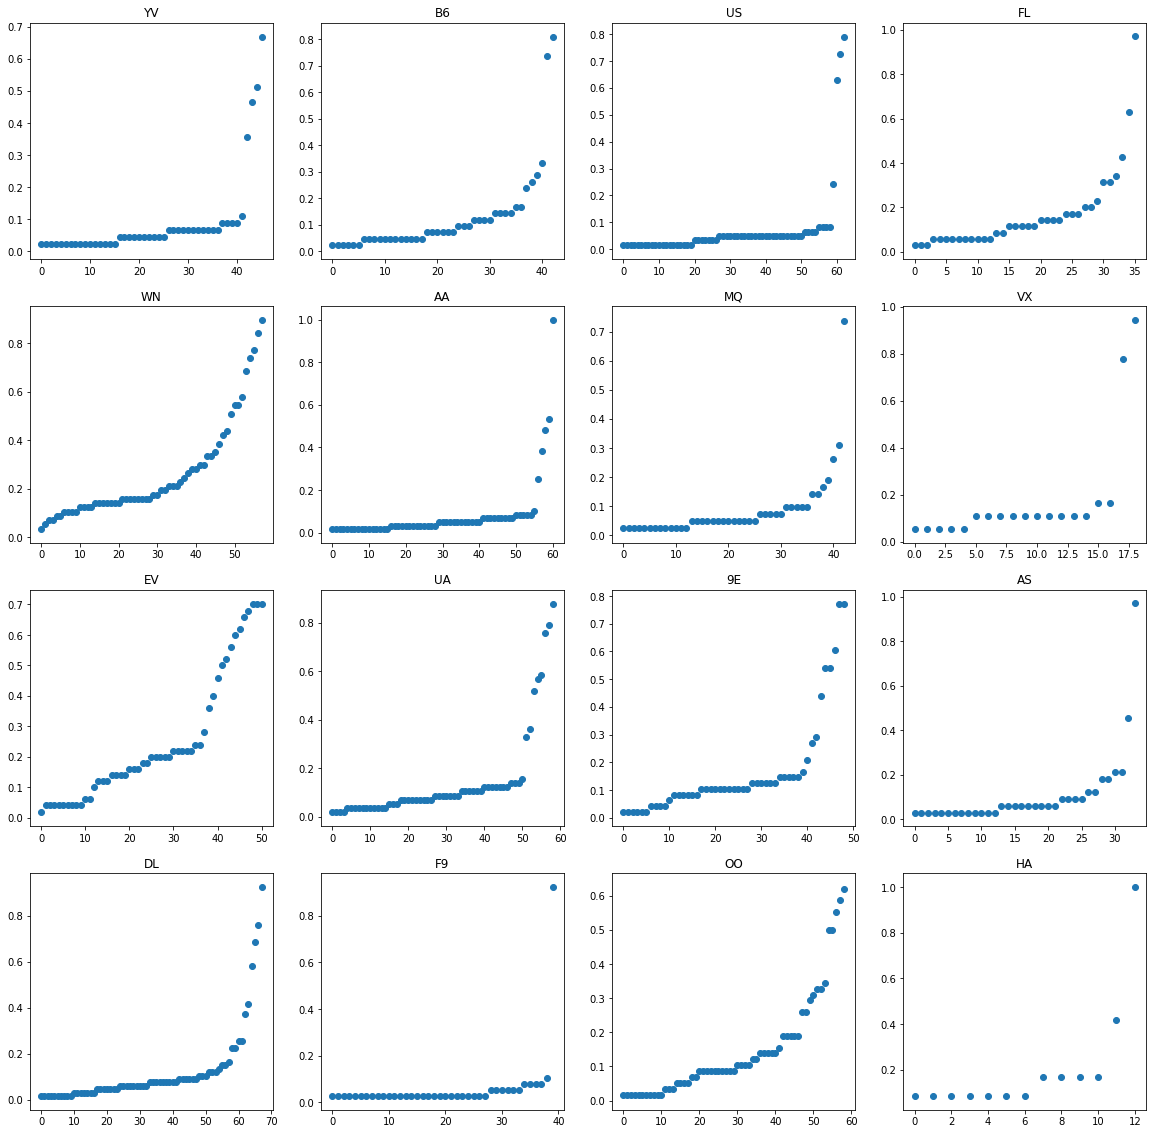

In [13]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig = plt.figure(figsize=(20, 20))
for i in range(0,len(networks)):
    ax = fig.add_subplot(4, 4, i+1)
    t=sorted(nx.degree_centrality(networks[i]).values())
    plt.scatter(range(0,len(t)),t)
    plt.title(carriers[i])

Text(0.5, 1.0, 'All Airlines')

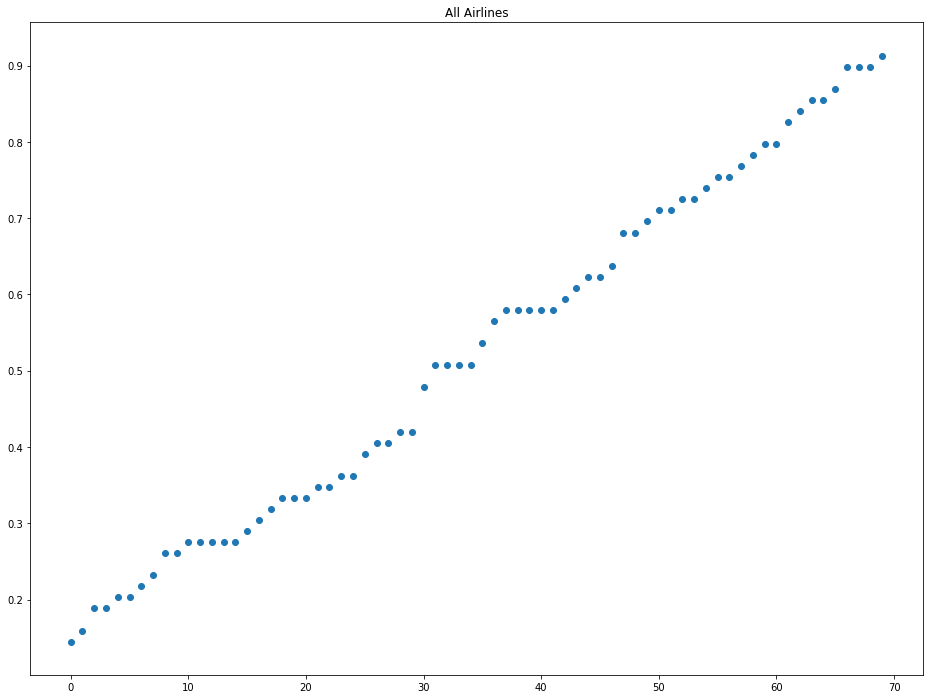

In [14]:
fig = plt.figure(figsize=(16, 12))
t=sorted(nx.degree_centrality(wholeGraph).values())
plt.scatter(range(0,len(t)),t)
plt.title("All Airlines")

In [0]:
import operator
x=(nx.betweenness_centrality(wholeGraph))
t=sorted(x.items(), key=operator.itemgetter(1))

In [0]:
ranking=[]
for i in t:
  ranking.append(list(airports.loc[airports['airport_id']==i[0]]['name']))

In [0]:
importantAirport={}
pt=[]
for i in range(len(networks)):
  x=(nx.betweenness_centrality(networks[i]))
  t=sorted(x.items(), key=operator.itemgetter(1))[-1]
  importantAirport[carriers[i]]=(list(airports.loc[airports['airport_id']==t[0]]['name']),t[1])
  pt.append(t[1])


In [18]:
importantAirport

{'9E': (['Minneapolis-St Paul International'], 0.22958926838476118),
 'AA': (['Dallas/Fort Worth International'], 0.7223352165725048),
 'AS': (['Seattle/Tacoma International'], 0.8268623737373737),
 'B6': (['Logan International'], 0.4574739309627963),
 'DL': (['Hartsfield-Jackson Atlanta International'], 0.4002194931808228),
 'EV': (['George Bush Intercontinental/Houston'], 0.18143004527117118),
 'F9': (['Denver International'], 0.9790823211875843),
 'FL': (['Hartsfield-Jackson Atlanta International'], 0.6057218038730644),
 'HA': (['Honolulu International'], 0.8939393939393939),
 'MQ': (["Chicago O'Hare International"], 0.7435429869987417),
 'OO': (['Denver International'], 0.20229142438187195),
 'UA': (["Chicago O'Hare International"], 0.32401837928153715),
 'US': (['Phoenix Sky Harbor International'], 0.46104353957341776),
 'VX': (['San Francisco International'], 0.6176470588235294),
 'WN': (['Chicago Midway International'], 0.17001217190063964),
 'YV': (['Charlotte Douglas Internati

In [19]:
for i in range(len(networks)):
  print()
  print(carriers[i],len(networks[i].nodes()))


YV 46

B6 43

US 63

FL 36

WN 58

AA 61

MQ 43

VX 19

EV 51

UA 59

9E 49

AS 34

DL 68

F9 40

OO 59

HA 13


In [20]:
for i in range(len(networks)):
  print()
  print(carriers[i],len(networks[i].edges()))


YV 90

B6 115

US 145

FL 107

WN 433

AA 152

MQ 78

VX 31

EV 317

UA 251

9E 194

AS 62

DL 281

F9 46

OO 256

HA 16


Text(0.5, 0, 'Degree')

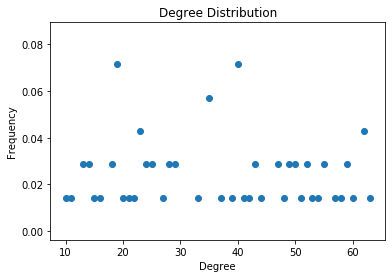

In [21]:
import collections
degree_sequence = sorted([d for n, d in wholeGraph.degree()]) # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cnt = [f/sum(cnt) for f in cnt]

fig, ax = plt.subplots()
plt.scatter(deg,cnt)

plt.title("Degree Distribution")
plt.ylabel("Frequency")
plt.xlabel("Degree")

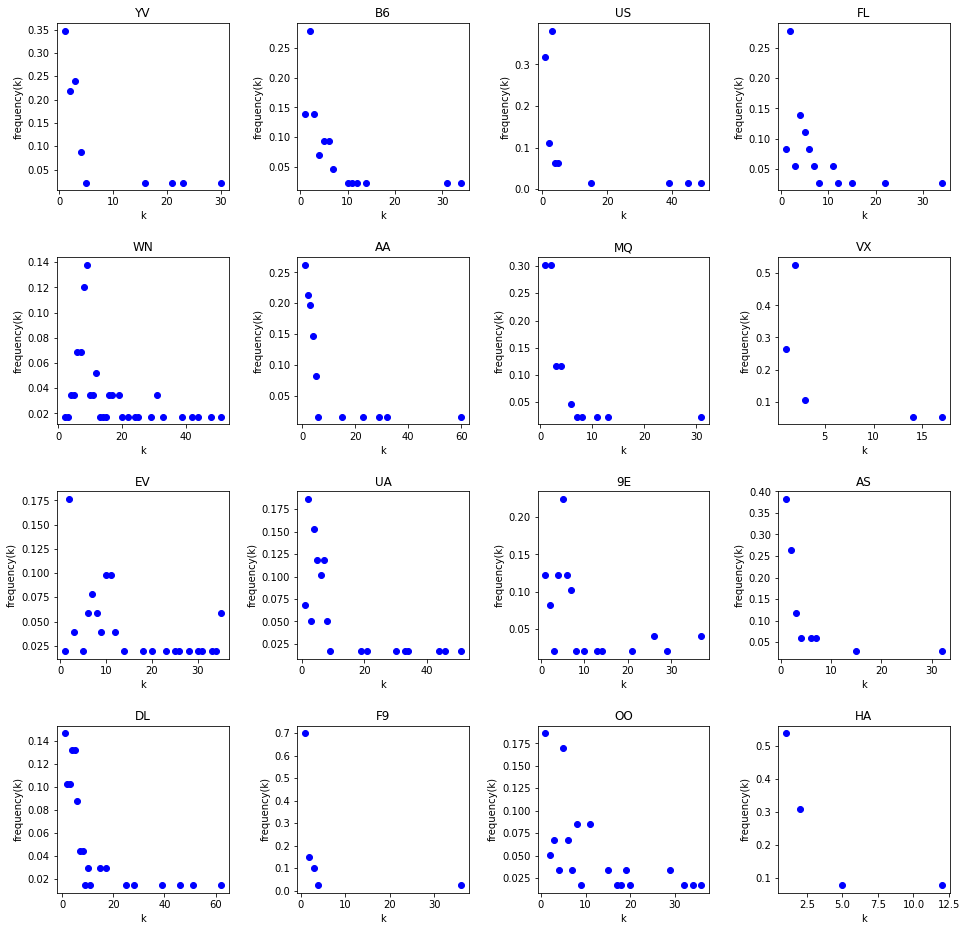

In [22]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
c = 0
for g in networks:
  degree_sequence = sorted([d for n, d in g.degree()]) # degree sequence
  degreeCount = collections.Counter(degree_sequence)
  deg, frq = zip(*degreeCount.items())
  frq = [f/sum(frq) for f in frq]
  ax = fig.add_subplot(4,4,c+1)
  plt.title(carriers[c])
  plt.xlabel("k")
  plt.ylabel("frequency(k)")
  plt.plot(deg, frq, 'bo')
  c += 1

In [0]:
airlines = {
  '9E': 'Endeavor',
  'AA': 'American',
  'AS': 'Alaska',
  'B6': 'JetBlue',
  'DL': 'Delta',
  'EV': 'ExpressJet',
  'F9': 'Frontier',
  'FL': 'AirTran',
  'HA': 'Hawaiian',
  'MQ': 'Envoy',
  'OO': 'SkyWest',
  'UA': 'United',
  'US': 'US Airways',
  'VX': 'Virgin America',
  'WN': 'Southwest',
  'YV': 'Mesa'
}

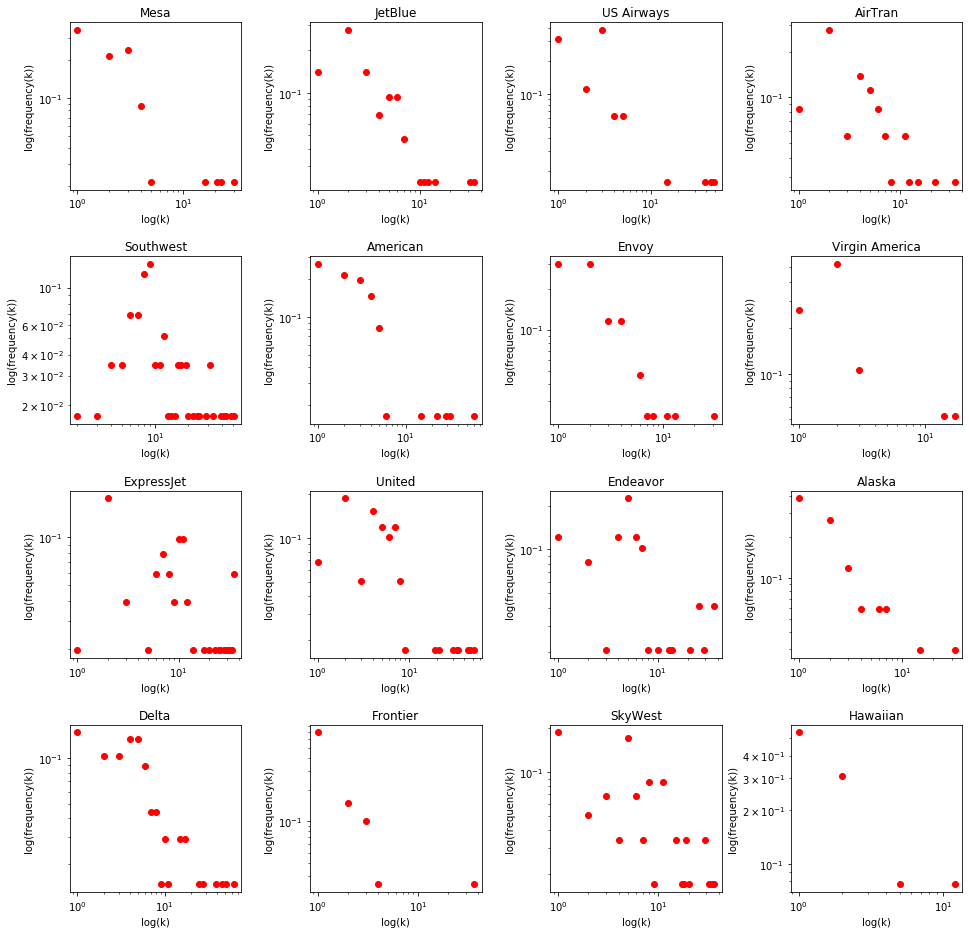

In [24]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(networks)):
  airline = networks[i]
  airline_degree_sequence = sorted([d for n, d in airline.degree()])
  airlineDegreeCount = collections.Counter(airline_degree_sequence)
  airlineDeg, airlineFrq = zip(*airlineDegreeCount.items())
  airlineFrq = [f/sum(airlineFrq) for f in airlineFrq]
  ax = fig.add_subplot(4,4,i+1)
  plt.title(airlines[carriers[i]])
  plt.xlabel("log(k)")
  plt.ylabel("log(frequency(k))")
  plt.loglog(airlineDeg, airlineFrq, 'ro')

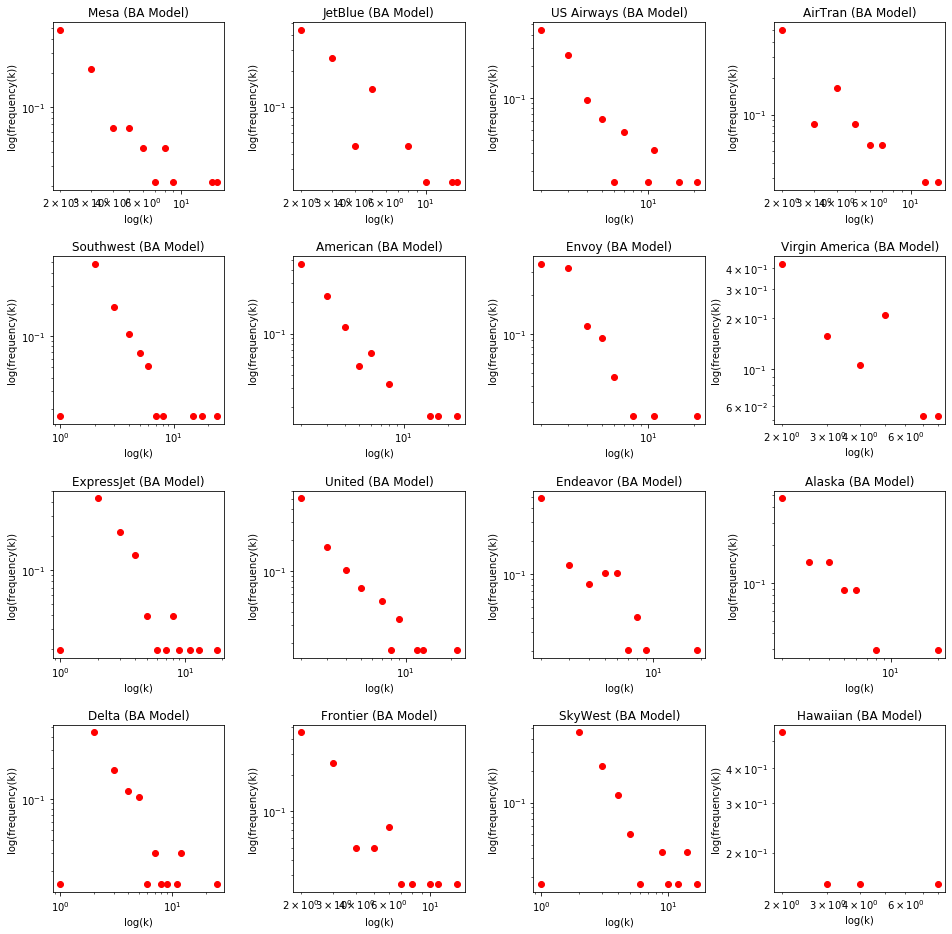

In [25]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(networks)):
  ba = nx.barabasi_albert_graph(len(networks[i].nodes),2)
  ba_degree_sequence = sorted([d for n, d in ba.degree()])
  baDegreeCount = collections.Counter(ba_degree_sequence)
  baDeg, baFrq = zip(*baDegreeCount.items())
  baFrq = [f/sum(baFrq) for f in baFrq]
  ax = fig.add_subplot(4,4,i+1)
  plt.title(airlines[carriers[i]] + " (BA Model)")
  plt.xlabel("log(k)")
  plt.ylabel("log(frequency(k))")
  plt.loglog(baDeg, baFrq, 'ro')

In [26]:
print(nx.average_clustering(alaska), nx.average_clustering(ba))
print(nx.diameter(alaska), nx.diameter(ba))
print(nx.average_shortest_path_length(alaska), nx.average_shortest_path_length(ba))

NameError: ignored

In [0]:
ws = nx.watts_strogatz_graph(58, 6, 0.25)

In [28]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
southwest_degree_sequence = sorted([d for n, d in southwest.degree()])
southwestDegreeCount = collections.Counter(southwest_degree_sequence)
southwestDeg, southwestFrq = zip(*southwestDegreeCount.items())
southwestFrq = [f/sum(southwestFrq) for f in southwestFrq]
ws_degree_sequence = sorted([d for n, d in ws.degree()])
wsDegreeCount = collections.Counter(ws_degree_sequence)
wsDeg, wsFrq = zip(*wsDegreeCount.items())
wsFrq = [f/sum(wsFrq) for f in wsFrq]
ax = fig.add_subplot(2,2,1)
plt.title("Southwest Airlines Degree Distribution")
plt.xlabel("k")
plt.ylabel("frequency(k)")
plt.plot(southwestDeg, southwestFrq, 'bo')
ax = fig.add_subplot(2,2,2)
plt.title("Watts-Strogatz Degree Distribution")
plt.xlabel("k")
plt.ylabel("frequency(k)")
plt.plot(wsDeg, wsFrq, 'bo')
ax = fig.add_subplot(2,2,3)
plt.title("Southwest Airlines Degree Distribution")
plt.xlabel("log(k)")
plt.ylabel("log(frequency(k))")
plt.loglog(southwestDeg, southwestFrq, 'ro')
ax = fig.add_subplot(2,2,4)
plt.title("Watts-Strogatz Degree Distribution")
plt.xlabel("log(k)")
plt.ylabel("log(frequency(k))")
plt.loglog(wsDeg, wsFrq, 'ro')

NameError: ignored

<Figure size 1152x1152 with 0 Axes>

In [0]:
print(nx.average_clustering(southwest), nx.average_clustering(ws))
print(nx.diameter(southwest), nx.diameter(ws))
print(nx.average_shortest_path_length(southwest), nx.average_shortest_path_length(ws))

In [29]:
importantAirport={}
pt=[]
whole=nx.Graph(wholeGraph)
for i in range(len(networks)):
  x=(nx.betweenness_centrality(networks[i]))
  t=sorted(x.items(), key=operator.itemgetter(1))[-1][0]
  net= nx.Graph(networks[i])
  net.remove_node(t)
  if t in list(whole.nodes()):
    whole.remove_node(t)
  st=carriers[i]+'2.gexf'
  nx.write_gexf(net,st)
  print(str(airlines[carriers[i]]) + ":",len(list(nx.connected_components(net)))/len(list(net.nodes())))

Mesa: 0.13333333333333333
JetBlue: 0.11904761904761904
US Airways: 0.22580645161290322
AirTran: 0.11428571428571428
Southwest: 0.017543859649122806
American: 0.2833333333333333
Envoy: 0.23809523809523808
Virgin America: 0.2777777777777778
ExpressJet: 0.02
United: 0.08620689655172414
Endeavor: 0.041666666666666664
Alaska: 0.42424242424242425
Delta: 0.08955223880597014
Frontier: 0.7435897435897436
SkyWest: 0.017241379310344827
Hawaiian: 0.6666666666666666


In [0]:
st='w.gexf'
nx.write_gexf(wholeGraph,st)